In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [4]:
df = pd.read_csv('superstore.csv')

print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (9800, 18)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region   

In [7]:
# convert date
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# check missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [9]:
total_sales = df['Sales'].sum()

print("Total Sales:", total_sales)

# The 'Profit' column was not found in the DataFrame. Please check the column names.
print("Available columns:", df.columns.tolist())
# total_profit = df['Profit'].sum()
# print("Total Profit:", total_profit)

Total Sales: 2261536.7827000003
Available columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']


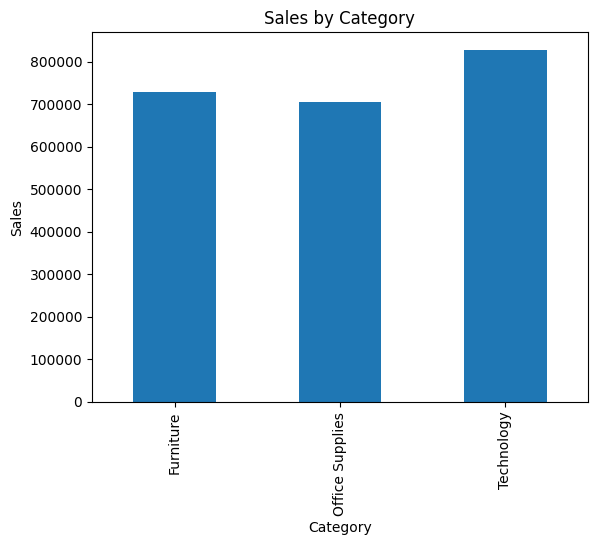

In [10]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

/tmp/ipython-input-559925648.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='Order Date')['Sales'].sum()


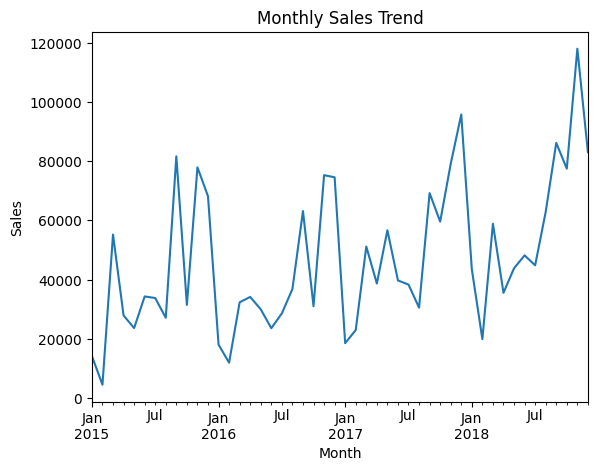

In [11]:
monthly = df.resample('M', on='Order Date')['Sales'].sum()

monthly.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


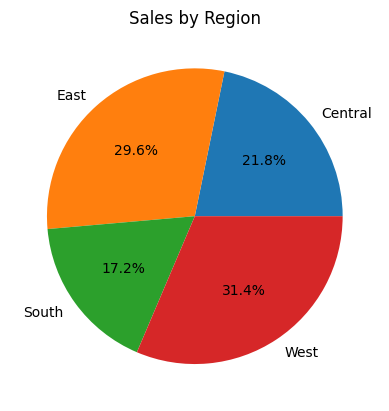

In [12]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title("Sales by Region")
plt.show()

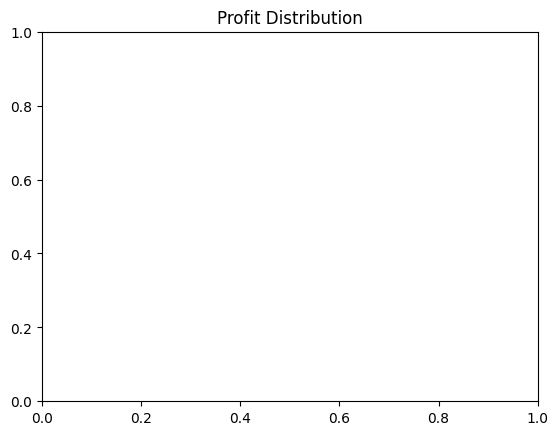

In [14]:
# sns.boxplot(x=df['Profit']) # 'Profit' column not found
# To plot profit, ensure the 'Profit' column is present in the DataFrame.
plt.title("Profit Distribution")
plt.show()

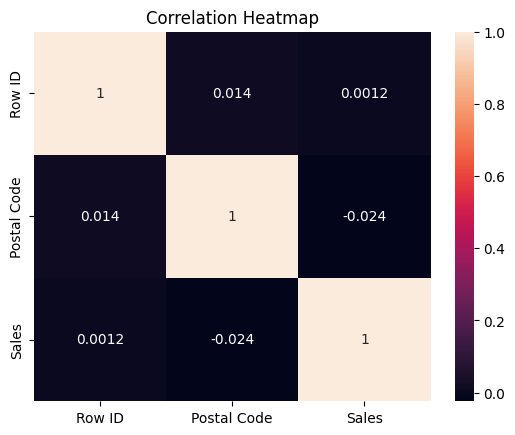

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [20]:
df.to_csv("cleaned_sales_data.csv", index=False)